In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv')
covid_19_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
15867,NaN,Mali,17.570692,-3.996166,3/25/20,2,0,0.0
15868,NaN,Saint Kitts and Nevis,17.357822,-62.782998,3/25/20,2,0,0.0
15869,Northwest Territories,Canada,64.825500,-124.845700,3/25/20,0,0,NaN
15870,Yukon,Canada,64.282300,-135.000000,3/25/20,0,0,NaN


In [3]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
covid_19_df['Date'] = pd.to_datetime(covid_19_df['Date'], format='%d/%m/%Y')
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df[covid_19_df['Country/Region'] == 'Guyana'].head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
125,NaN,Guyana,5.0,-58.75,2020-01-22,0,0,0.0
373,NaN,Guyana,5.0,-58.75,2020-01-23,0,0,0.0
621,NaN,Guyana,5.0,-58.75,2020-01-24,0,0,0.0


In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
covid_19_df['Active'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df = covid_19_df.sort_values(by=['Date'], ascending=True)
covid_19_df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,0,0.0,0.0
157,NaN,Mauritius,-20.2,57.5,2020-01-22,0,0,0.0,0.0


### Finding Countries with most confirmed cases

In [5]:
last_covid_df = covid_19_df[covid_19_df['Date'] == covid_19_df['Date'].max()].reset_index(drop=True)
last_covid_df = last_covid_df.drop(columns=['Lat', 'Long'])
top_50 = last_covid_df.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(50)
top_50.head(2)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81661,3285,73773.0,4603.0
Italy,74386,7503,9362.0,57521.0


In [6]:
def prepare_data(func):
    def inside(df, country):
        date_range = df['Date'].sort_values().drop_duplicates().reset_index(drop=True)
        df = df[df['Country/Region'] == country]
        if (country == 'China') | (country == 'US') | (country == 'Australia') | (country == 'Canada'):
            df = df.groupby('Date').sum()
        elif df[df['Province/State'] == country].notna().any().any():
            df = df[df['Province/State'] == country]
        df = df.sort_values(by='Date').reset_index(drop=True)
        func(df, country, date_range)
    return inside

In [7]:
@prepare_data
def show_increment(df, label, date_range):
    my_xticks = range(0, len(date_range), 10)
#     l_date_range = list(date_range)
    my_xticks_labels = list(date_range)[0:len(date_range):10]
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax = sns.lineplot(data=df[cases], ax=ax)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xticks_labels)
    ax.set_xlabel(label)
    plt.show()

### Plots for 50 countries with most confirmed cases

1 . China
Confirmed: 81661 
Active: 4603.0 
Recovered: 73773.0 
Deaths: 3285


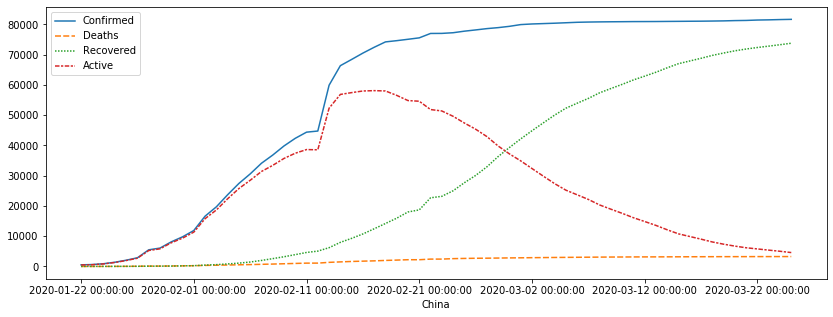

2 . Italy
Confirmed: 74386 
Active: 57521.0 
Recovered: 9362.0 
Deaths: 7503


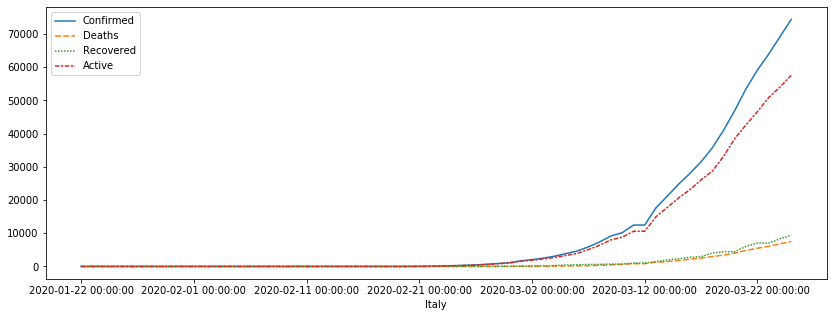

3 . US
Confirmed: 65778 
Active: 64475.0 
Recovered: 361.0 
Deaths: 942


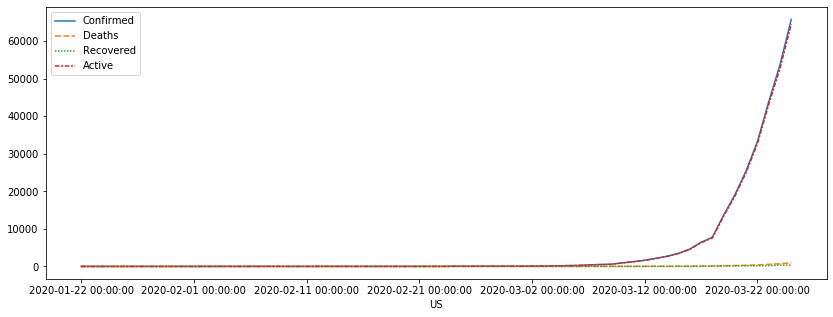

4 . Spain
Confirmed: 49515 
Active: 40501.0 
Recovered: 5367.0 
Deaths: 3647


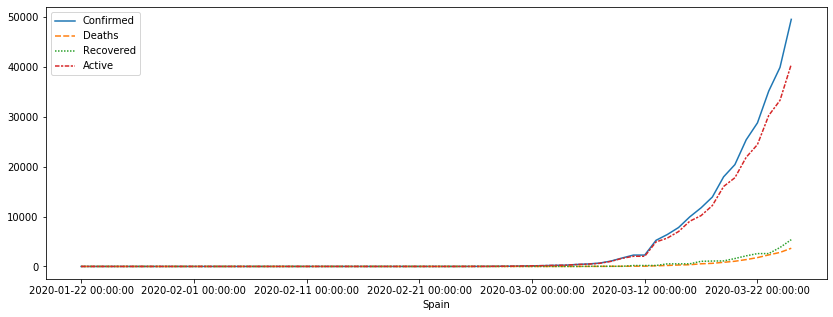

5 . Germany
Confirmed: 37323 
Active: 33570.0 
Recovered: 3547.0 
Deaths: 206


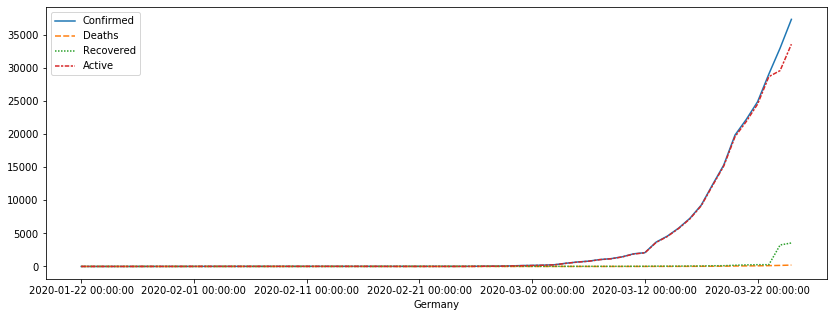

6 . Iran
Confirmed: 27017 
Active: 15315.0 
Recovered: 9625.0 
Deaths: 2077


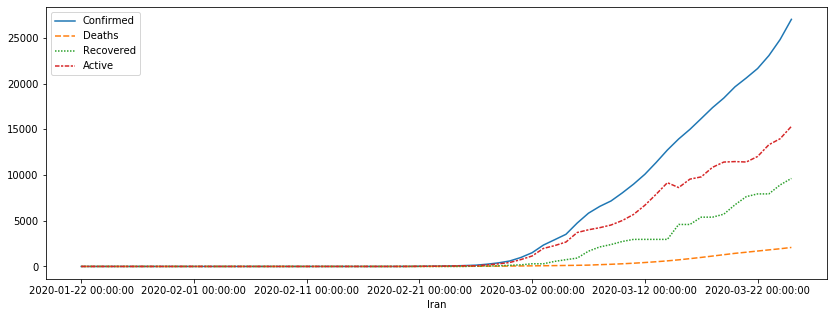

7 . France
Confirmed: 25600 
Active: 20360.0 
Recovered: 3907.0 
Deaths: 1333


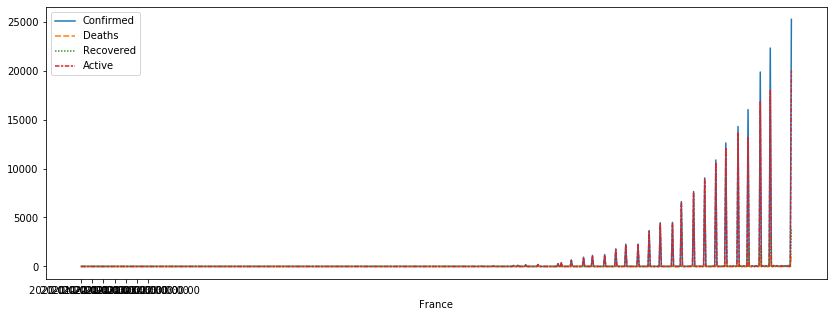

8 . Switzerland
Confirmed: 10897 
Active: 10613.0 
Recovered: 131.0 
Deaths: 153


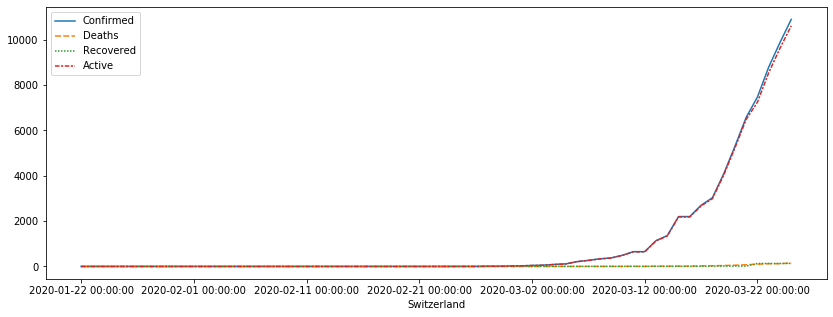

9 . United Kingdom
Confirmed: 9640 
Active: 9034.0 
Recovered: 140.0 
Deaths: 466


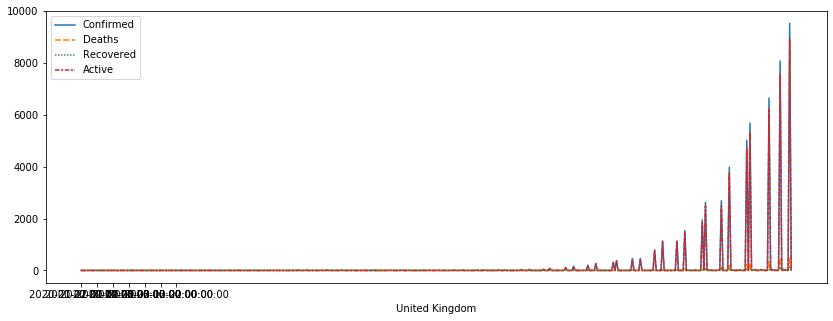

10 . Korea, South
Confirmed: 9137 
Active: 5281.0 
Recovered: 3730.0 
Deaths: 126


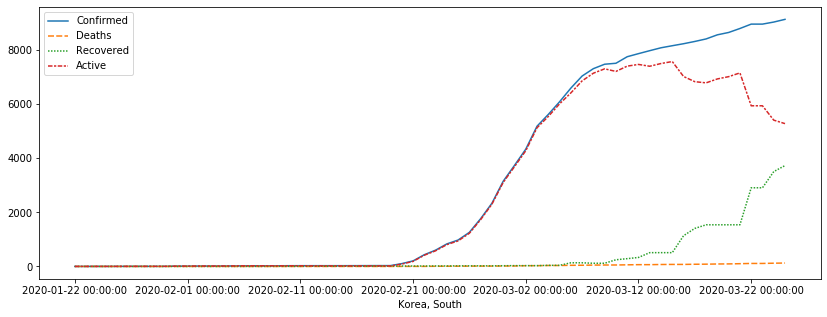

11 . Netherlands
Confirmed: 6438 
Active: 6077.0 
Recovered: 4.0 
Deaths: 357


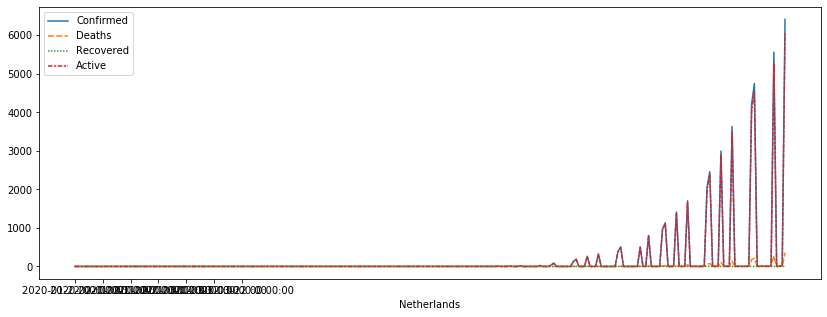

12 . Austria
Confirmed: 5588 
Active: 5549.0 
Recovered: 9.0 
Deaths: 30


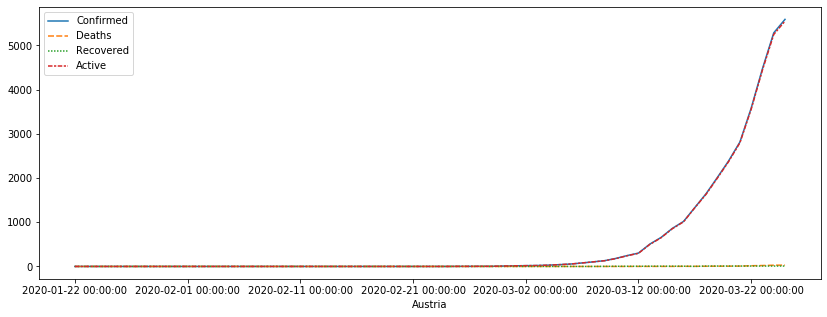

13 . Belgium
Confirmed: 4937 
Active: 4212.0 
Recovered: 547.0 
Deaths: 178


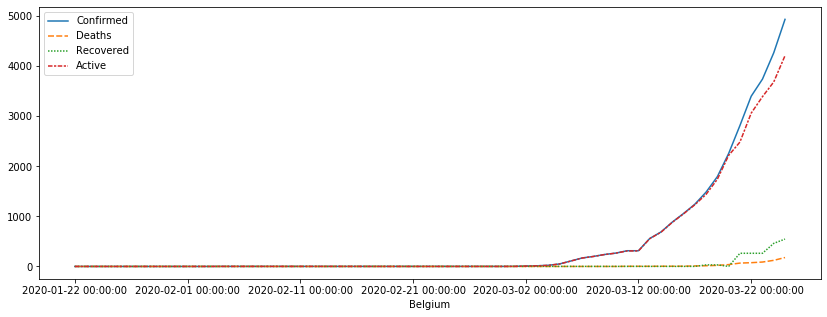

14 . Canada
Confirmed: 3251 
Active: 0.0 
Recovered: 0.0 
Deaths: 30


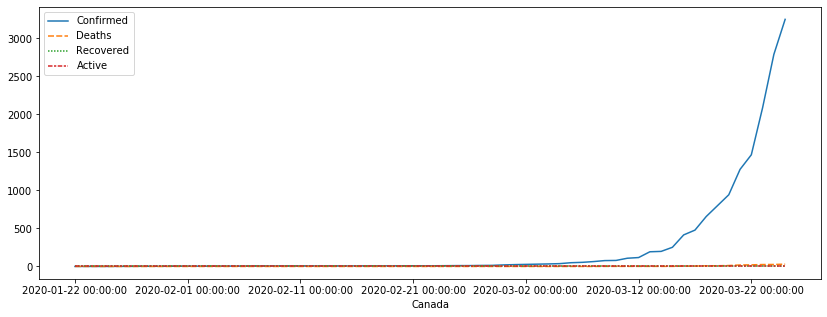

15 . Norway
Confirmed: 3084 
Active: 3064.0 
Recovered: 6.0 
Deaths: 14


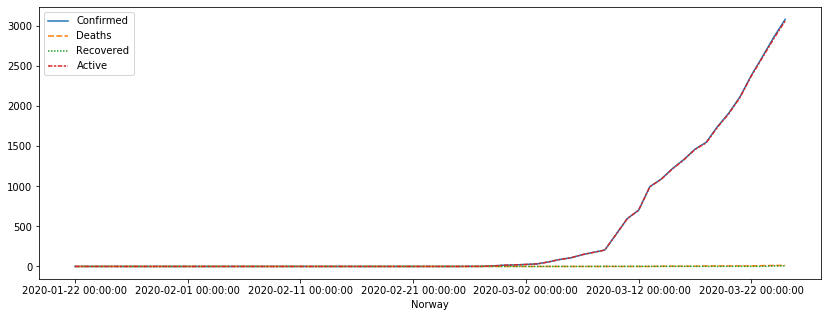

16 . Portugal
Confirmed: 2995 
Active: 2930.0 
Recovered: 22.0 
Deaths: 43


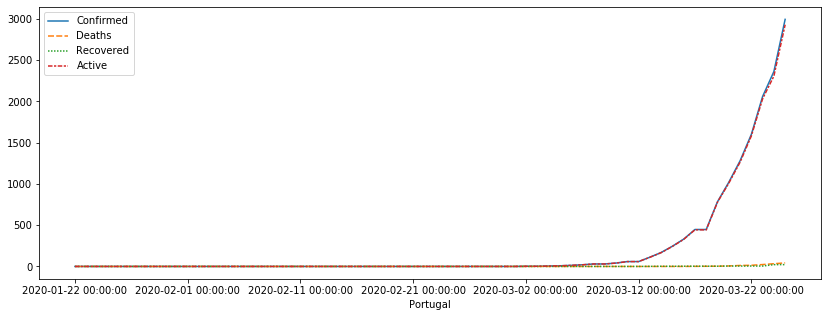

17 . Brazil
Confirmed: 2554 
Active: 2493.0 
Recovered: 2.0 
Deaths: 59


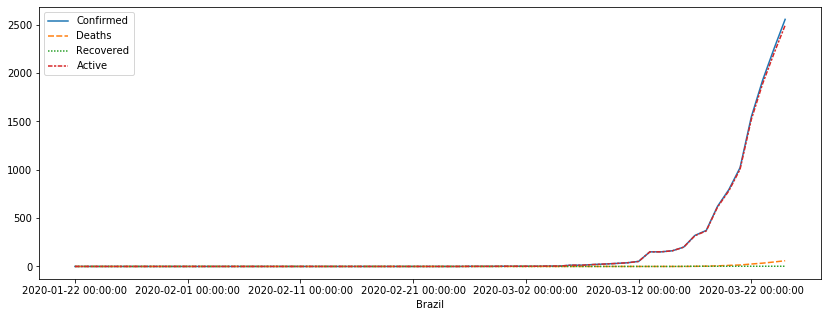

18 . Sweden
Confirmed: 2526 
Active: 2448.0 
Recovered: 16.0 
Deaths: 62


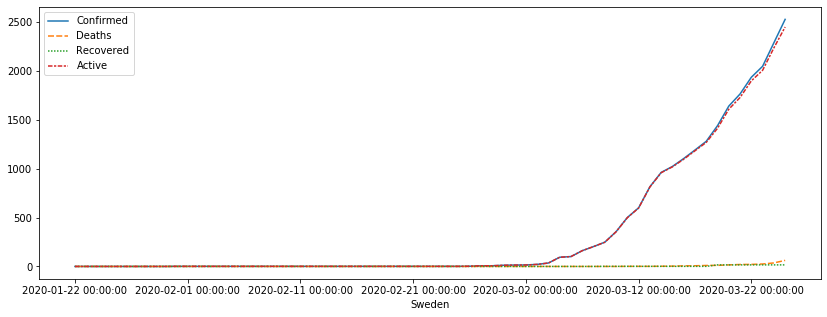

19 . Turkey
Confirmed: 2433 
Active: 2348.0 
Recovered: 26.0 
Deaths: 59


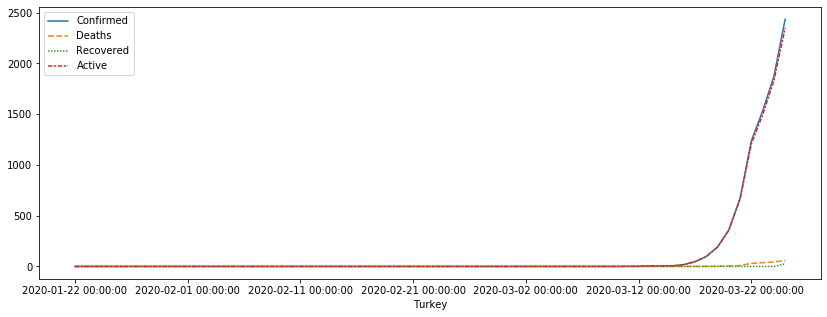

20 . Israel
Confirmed: 2369 
Active: 2306.0 
Recovered: 58.0 
Deaths: 5


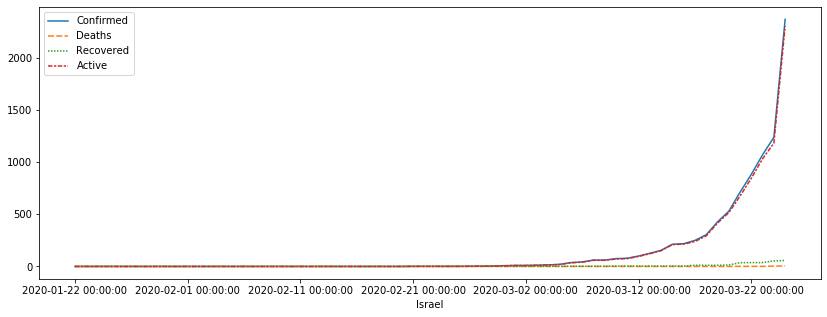

21 . Australia
Confirmed: 2364 
Active: 2237.0 
Recovered: 119.0 
Deaths: 8


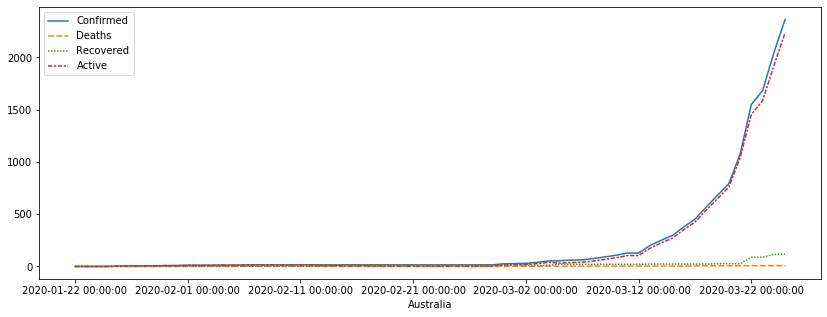

22 . Denmark
Confirmed: 1862 
Active: 1787.0 
Recovered: 41.0 
Deaths: 34


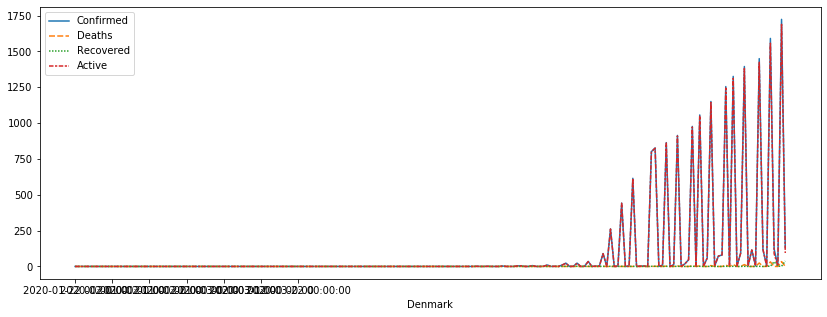

23 . Malaysia
Confirmed: 1796 
Active: 1577.0 
Recovered: 199.0 
Deaths: 20


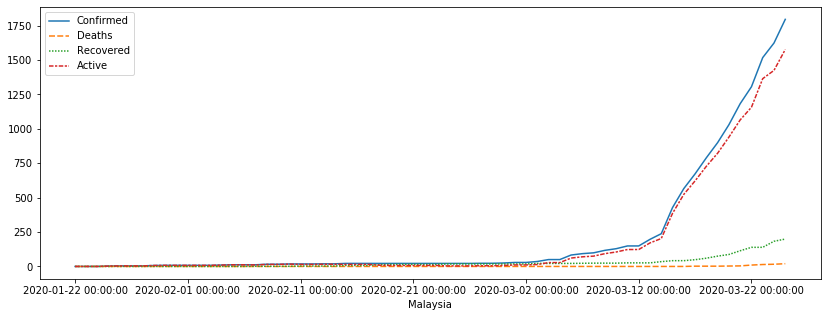

24 . Czechia
Confirmed: 1654 
Active: 1638.0 
Recovered: 10.0 
Deaths: 6


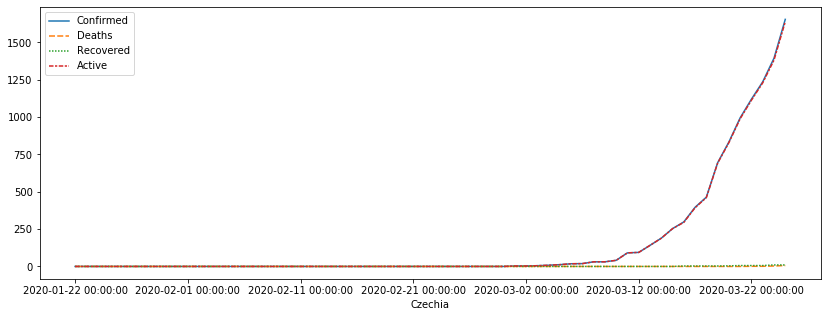

25 . Ireland
Confirmed: 1564 
Active: 1550.0 
Recovered: 5.0 
Deaths: 9


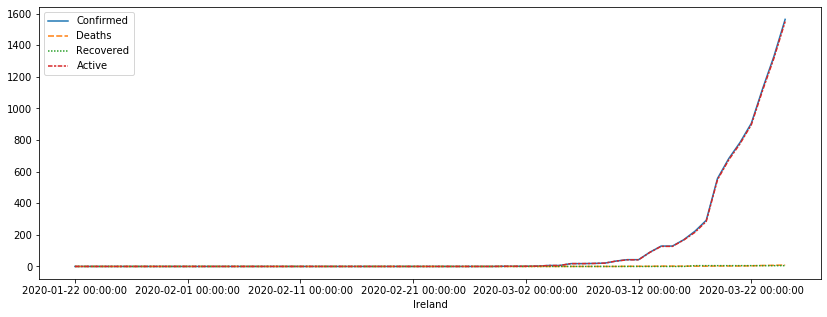

26 . Luxembourg
Confirmed: 1333 
Active: 1319.0 
Recovered: 6.0 
Deaths: 8


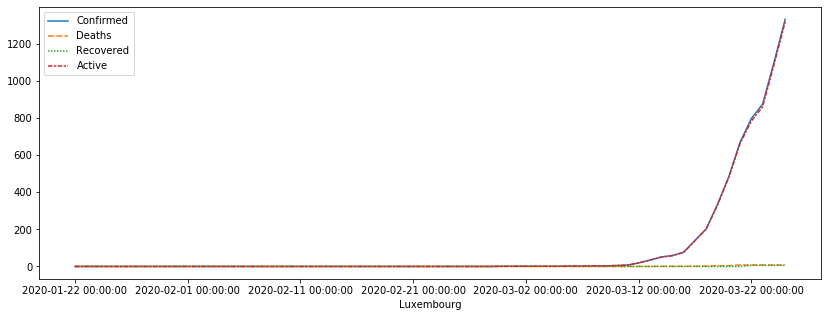

27 . Japan
Confirmed: 1307 
Active: 952.0 
Recovered: 310.0 
Deaths: 45


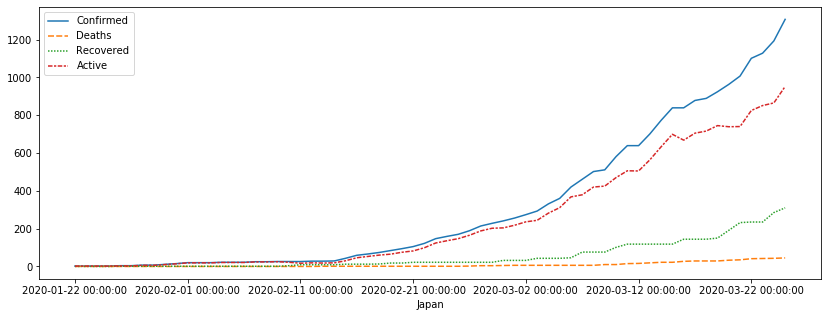

28 . Ecuador
Confirmed: 1173 
Active: 1142.0 
Recovered: 3.0 
Deaths: 28


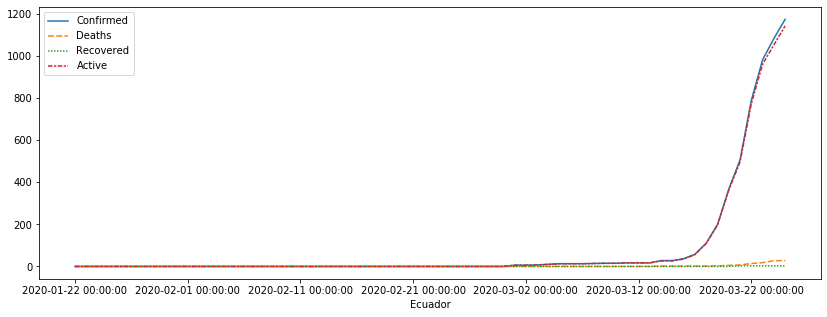

29 . Chile
Confirmed: 1142 
Active: 1117.0 
Recovered: 22.0 
Deaths: 3


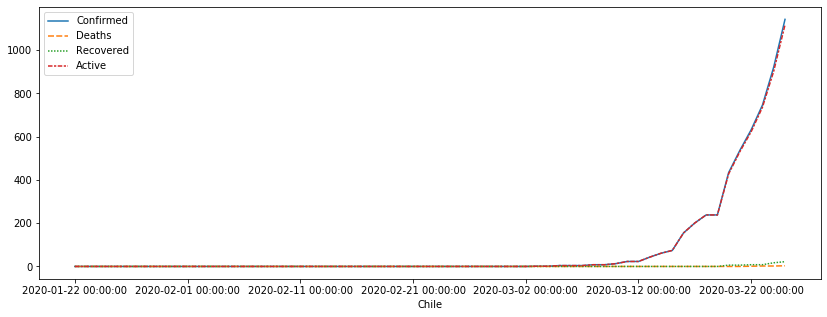

30 . Pakistan
Confirmed: 1063 
Active: 1034.0 
Recovered: 21.0 
Deaths: 8


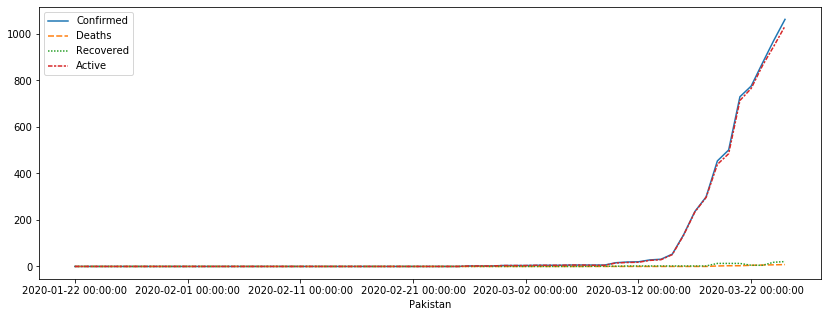

31 . Poland
Confirmed: 1051 
Active: 1030.0 
Recovered: 7.0 
Deaths: 14


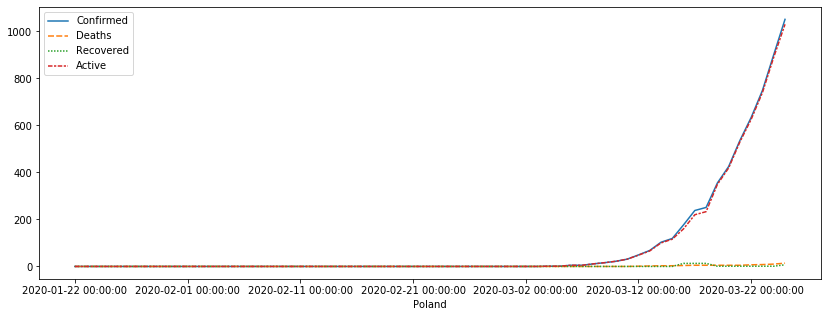

32 . Thailand
Confirmed: 934 
Active: 860.0 
Recovered: 70.0 
Deaths: 4


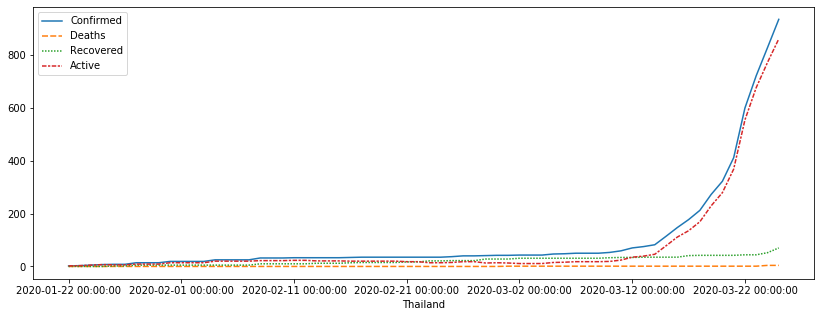

33 . Romania
Confirmed: 906 
Active: 803.0 
Recovered: 86.0 
Deaths: 17


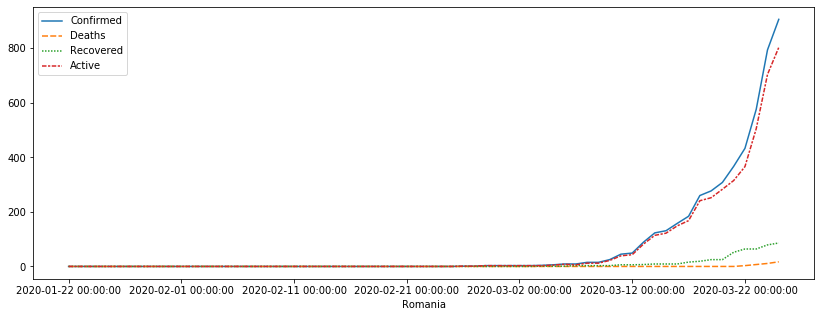

34 . Saudi Arabia
Confirmed: 900 
Active: 869.0 
Recovered: 29.0 
Deaths: 2


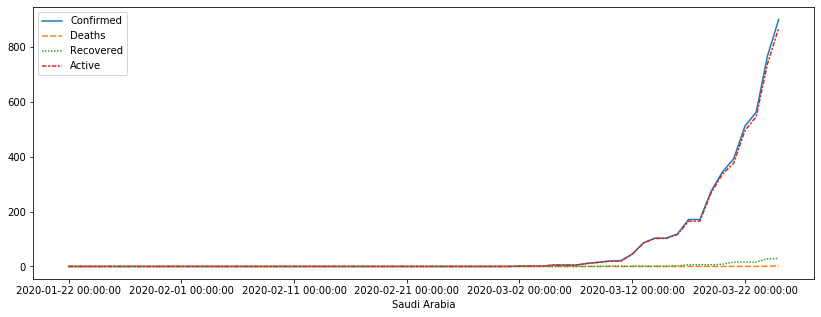

35 . Finland
Confirmed: 880 
Active: 867.0 
Recovered: 10.0 
Deaths: 3


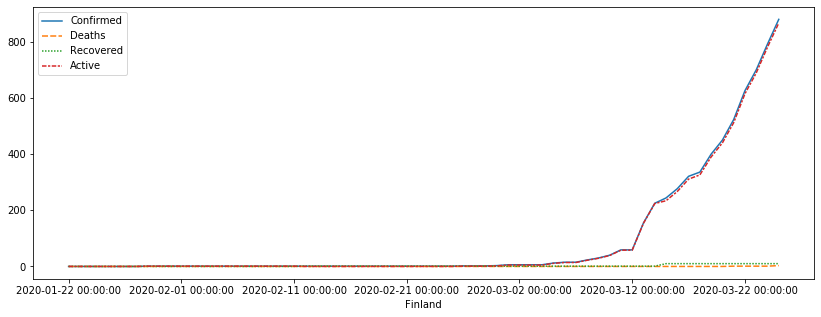

36 . Greece
Confirmed: 821 
Active: 763.0 
Recovered: 36.0 
Deaths: 22


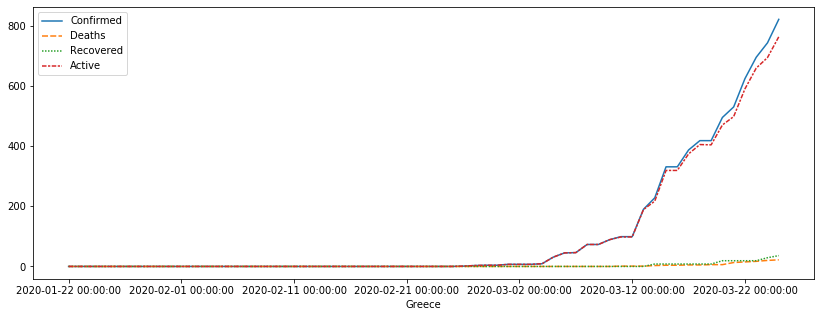

37 . Indonesia
Confirmed: 790 
Active: 701.0 
Recovered: 31.0 
Deaths: 58


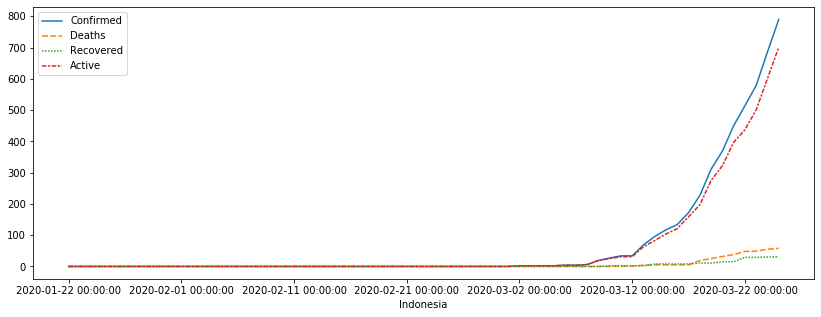

38 . Iceland
Confirmed: 737 
Active: 679.0 
Recovered: 56.0 
Deaths: 2


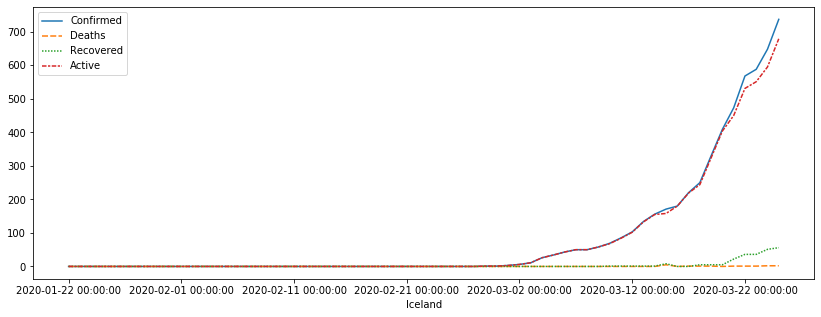

39 . Diamond Princess
Confirmed: 712 
Active: 115.0 
Recovered: 587.0 
Deaths: 10


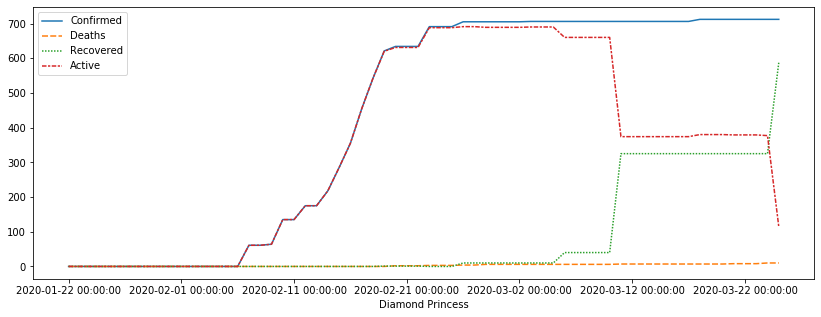

40 . South Africa
Confirmed: 709 
Active: 697.0 
Recovered: 12.0 
Deaths: 0


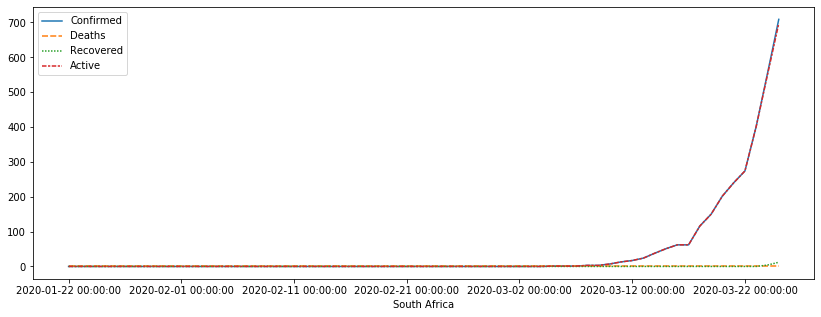

41 . Russia
Confirmed: 658 
Active: 626.0 
Recovered: 29.0 
Deaths: 3


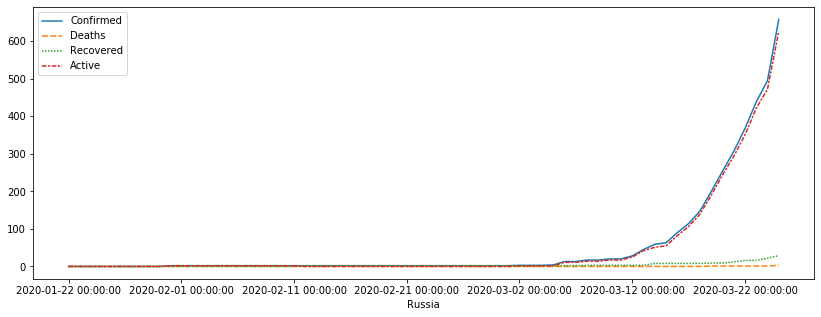

42 . India
Confirmed: 657 
Active: 602.0 
Recovered: 43.0 
Deaths: 12


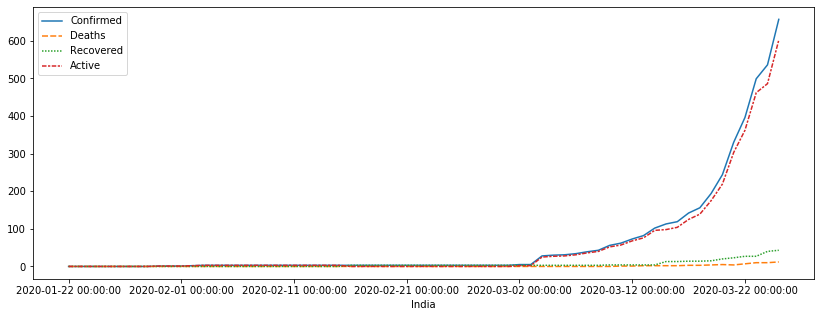

43 . Philippines
Confirmed: 636 
Active: 572.0 
Recovered: 26.0 
Deaths: 38


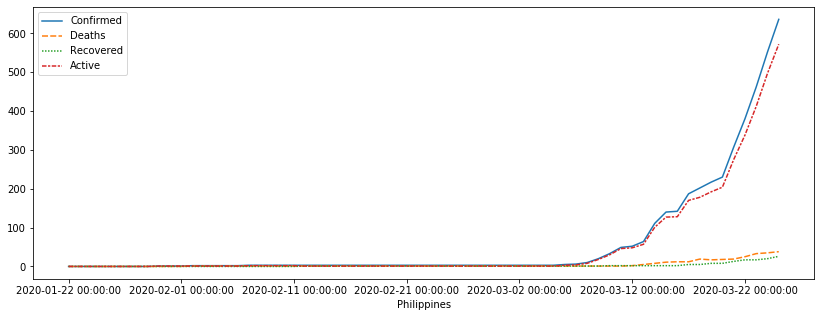

44 . Singapore
Confirmed: 631 
Active: 469.0 
Recovered: 160.0 
Deaths: 2


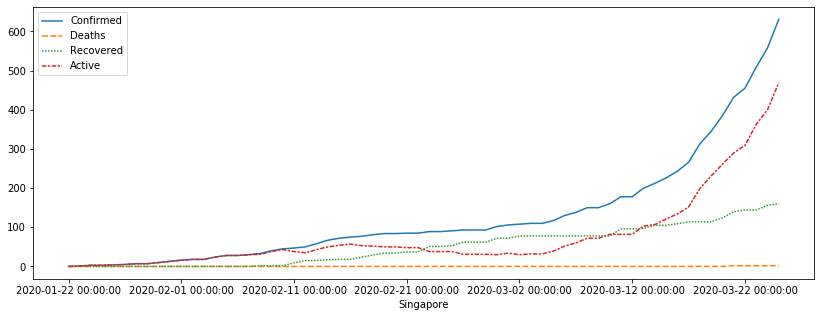

45 . Qatar
Confirmed: 537 
Active: 496.0 
Recovered: 41.0 
Deaths: 0


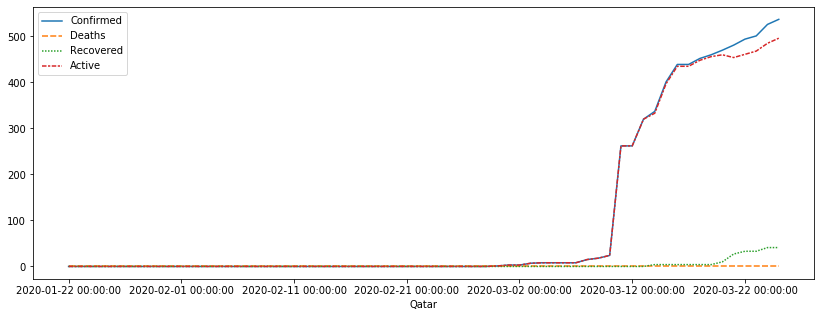

46 . Slovenia
Confirmed: 528 
Active: 513.0 
Recovered: 10.0 
Deaths: 5


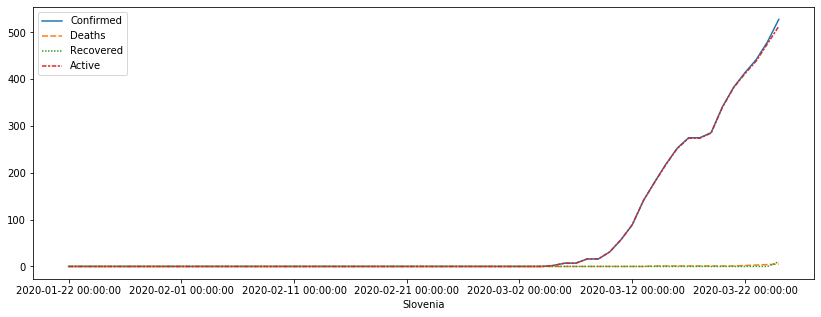

47 . Peru
Confirmed: 480 
Active: 470.0 
Recovered: 1.0 
Deaths: 9


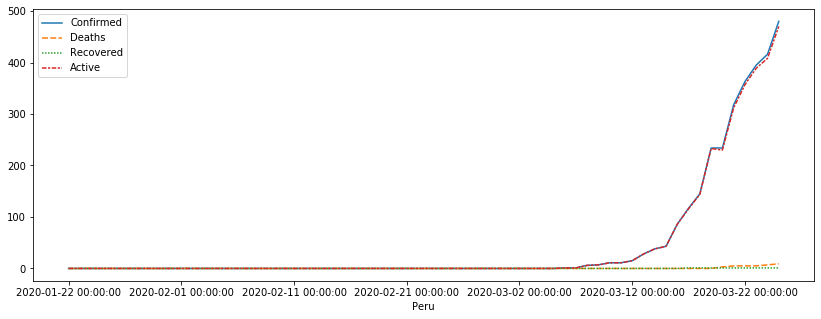

48 . Colombia
Confirmed: 470 
Active: 458.0 
Recovered: 8.0 
Deaths: 4


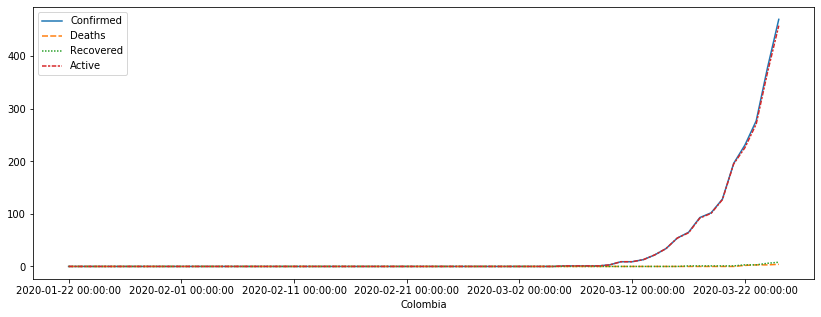

49 . Egypt
Confirmed: 456 
Active: 340.0 
Recovered: 95.0 
Deaths: 21


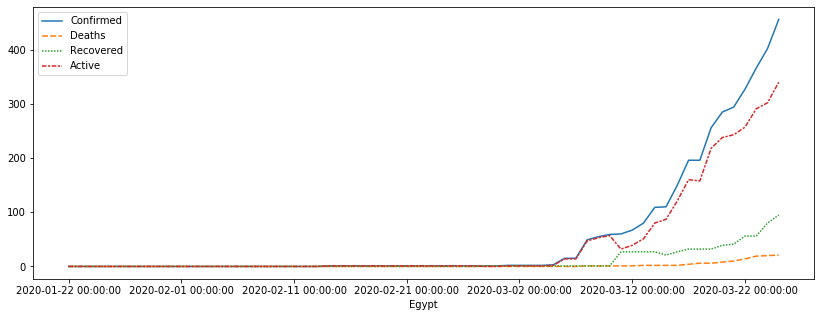

50 . Panama
Confirmed: 443 
Active: 434.0 
Recovered: 1.0 
Deaths: 8


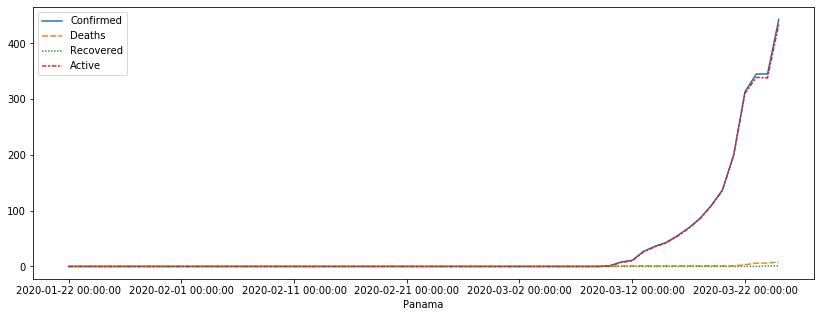

In [8]:
for index, country in enumerate(top_50.index):
    print(index+1,'.', country)
    print('Confirmed:', top_50.Confirmed[country],'\n'\
          'Active:', top_50.Active[country],'\n'\
          'Recovered:', top_50.Recovered[country],'\n'\
          'Deaths:', top_50.Deaths[country]
         )
    show_increment(covid_19_df, country)